# Exercise 1 : Conversion from Celsius to Fahrenheit

The problem we will solve is to convert from Celsius to Fahrenheit, where the approximate formula is:

$$ f = c \times 1.8 + 32 $$


Of course, it would be simple enough to create a conventional Python function that directly performs this calculation, but that wouldn't be machine learning.


Instead, we will give `TensorFlow` some sample Celsius values (0, 8, 15, 22, 38) and their corresponding Fahrenheit values (32, 46, 59, 72, 100).
Then, we will train a model that figures out the above formula through the training process.

## Import dependencies

First, import TensorFlow. Here, we're calling it `tf` for ease of use. We also tell it to only display errors.

Next, import [NumPy](http://www.numpy.org/) as `np`. Numpy helps us to represent our data as highly performant lists.

In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals
import tensorflow as tf
print(tf.__version__)
import numpy as np

2.1.0


In [2]:
import logging
logger = tf.get_logger()
logger.setLevel(logging.ERROR)

## Set up training data

As we saw before, supervised Machine Learning is all about figuring out an algorithm given a set of inputs and outputs. Since the task in this Codelab is to create a model that can give the temperature in Fahrenheit when given the degrees in Celsius, we create two lists `celsius_q` and `fahrenheit_a` that we can use to train our model.

In [3]:
celsius_q    = np.array([-40, -10,  0,  8, 15, 22,  38],  dtype=float)
fahrenheit_a = np.array([-40,  14, 32, 46, 59, 72, 100],  dtype=float)

for i,c in enumerate(celsius_q):
  print("{} degrees Celsius = {} degrees Fahrenheit".format(c, fahrenheit_a[i]))

-40.0 degrees Celsius = -40.0 degrees Fahrenheit
-10.0 degrees Celsius = 14.0 degrees Fahrenheit
0.0 degrees Celsius = 32.0 degrees Fahrenheit
8.0 degrees Celsius = 46.0 degrees Fahrenheit
15.0 degrees Celsius = 59.0 degrees Fahrenheit
22.0 degrees Celsius = 72.0 degrees Fahrenheit
38.0 degrees Celsius = 100.0 degrees Fahrenheit


### Some Machine Learning terminology

 - **Feature** — The input(s) to our model. In this case, a single value — the degrees in Celsius.

 - **Labels** — The output our model predicts. In this case, a single value — the degrees in Fahrenheit.

 - **Example** — A pair of inputs/outputs used during training. In our case a pair of values from `celsius_q` and `fahrenheit_a` at a specific index, such as `(22,72)`.



## 1. Define the Network

Next create the model. We will use the simplest possible model we can, a Dense network. Since the problem is straightforward, this network will require only a single layer, with a single neuron.

### Build a layer

We'll call the layer `l0` and create it by instantiating `tf.keras.layers.Dense` with the following configuration:

*   `input_shape=[1]` — This specifies that the input to this layer is a single value. That is, the shape is a one-dimensional array with one member. Since this is the first (and only) layer, that input shape is the input shape of the entire model. The single value is a floating point number, representing degrees Celsius.

*   `units=1` — This specifies the number of neurons in the layer. The number of neurons defines how many internal variables the layer has to try to learn how to solve the problem (more later). Since this is the final layer, it is also the size of the model's output — a single float value representing degrees Fahrenheit. (In a multi-layered network, the size and shape of the layer would need to match the `input_shape` of the next layer.)


In [4]:
l0 = tf.keras.layers.Dense(units=1, input_shape=[1])

### Assemble layers into the model

Once layers are defined, they need to be assembled into a model. The Sequential model definition takes a list of layers as argument, specifying the calculation order from the input to the output.

This model has just a single layer, l0.

In [5]:
model = tf.keras.Sequential([
  tf.keras.layers.Dense(units=1, input_shape=[1])
])

## 2. Compile the network, with loss and optimizer functions

Before training, the model has to be compiled. When compiled for training, the model is given:

- **Loss function** — A way of measuring how far off predictions are from the desired outcome. (The measured difference is called the "loss".)

- **Optimizer function** — A way of adjusting internal values in order to reduce the loss.


In [6]:
model.compile(loss='mean_squared_error',
              optimizer=tf.keras.optimizers.Adam(0.1))

These are used during training (`model.fit()`, below) to first calculate the loss at each point, and then improve it. In fact, the act of calculating the current loss of a model and then improving it is precisely what training is.

During training, the optimizer function is used to calculate adjustments to the model's internal variables. The goal is to adjust the internal variables until the model (which is really a math function) mirrors the actual equation for converting Celsius to Fahrenheit.

`TensorFlow` uses numerical analysis to perform this tuning, and all this complexity is hidden from you so we will not go into the details here. What is useful to know about these parameters are:

The loss function ([mean squared error](https://en.wikipedia.org/wiki/Mean_squared_error)) and the optimizer ([Adam](https://machinelearningmastery.com/adam-optimization-algorithm-for-deep-learning/)) used here are standard for simple models like this one, but many others are available. It is not important to know how these specific functions work at this point.

One part of the Optimizer you may need to think about when building your own models is the learning rate (`0.1` in the code above). This is the step size taken when adjusting values in the model. If the value is too small, it will take too many iterations to train the model. Too large, and accuracy goes down. Finding a good value often involves some trial and error, but the range is usually within 0.001 (default), and 0.1

## 3. Fit the model

Train the model by calling the `fit` method.

During training, the model takes in Celsius values, performs a calculation using the current internal variables (called "weights") and outputs values which are meant to be the Fahrenheit equivalent. Since the weights are initially set randomly, the output will not be close to the correct value. The difference between the actual output and the desired output is calculated using the loss function, and the optimizer function directs how the weights should be adjusted.

This cycle of calculate, compare, adjust is controlled by the `fit` method. The first argument is the inputs, the second argument is the desired outputs. The `epochs` argument specifies how many times this cycle should be run, and the `verbose` argument controls how much output the method produces.

In [7]:
history = model.fit(celsius_q, fahrenheit_a, epochs=500, verbose=False)
print("Finished training the model")

Finished training the model


## 4. Evaluate the Model - Display training statistics

The `fit` method returns a history object. We can use this object to plot how the loss of our model goes down after each training epoch. A high loss means that the Fahrenheit degrees the model predicts is far from the corresponding value in `fahrenheit_a`.

We'll use [Matplotlib](https://matplotlib.org/) to visualize this (you could use another tool). As you can see, our model improves very quickly at first, and then has a steady, slow improvement until it is very near "perfect" towards the end.



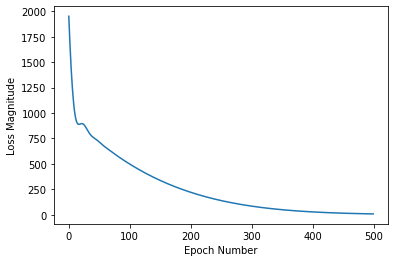

In [8]:
import matplotlib.pyplot as plt
plt.xlabel('Epoch Number')
plt.ylabel("Loss Magnitude")
plt.plot(history.history['loss'])

## 5. Use the model to predict values

Now you have a model that has been trained to learn the relationship between `celsius_q` and `fahrenheit_a`. You can use the predict method to have it calculate the Fahrenheit degrees for a previously unknown Celsius degrees.

So, for example, if the Celsius value is 100, what do you think the Fahrenheit result will be? Take a guess before you run this code.

In [9]:
print(model.predict([100.0]))

[[211.33295]]


The correct answer is $100 \times 1.8 + 32 = 212$, so our model is doing really well.

### To review


*   We created a model with a Dense layer
*   We trained it with 3500 examples (7 pairs, over 500 epochs).

Our model tuned the variables (weights) in the Dense layer until it was able to return the correct Fahrenheit value for any Celsius value. (Remember, 100 Celsius was not part of our training data.)




## Looking at the layer weights

Finally, let's print the internal variables of the Dense layer. 

In [10]:
print("These are the layer variables: {}".format(model.get_weights()))

These are the layer variables: [array([[1.8213079]], dtype=float32), array([29.202171], dtype=float32)]


The first variable is close to ~1.8 and the second to ~32. These values (1.8 and 32) are the actual variables in the real conversion formula.

This is really close to the values in the conversion formula. We can show how a Dense layer works, but for a single neuron with a single input and a single output, the internal math looks the same as [the equation for a line](https://en.wikipedia.org/wiki/Linear_equation#Slope%E2%80%93intercept_form), $y = mx + b$, which has the same form as the conversion equation, $f = 1.8c + 32$.

Since the form is the same, the variables should converge on the standard values of 1.8 and 32, which is exactly what happened.

With additional neurons, additional inputs, and additional outputs, the formula becomes much more complex, but the idea is the same.

### A little experiment

Just for fun, what if we created more Dense layers with different units, which therefore also has more variables?

In [11]:
l0 = tf.keras.layers.Dense(units=4, input_shape=[1])
l1 = tf.keras.layers.Dense(units=4)
l2 = tf.keras.layers.Dense(units=1)
model = tf.keras.Sequential([l0, l1, l2])
model.compile(loss='mean_squared_error', optimizer=tf.keras.optimizers.Adam(0.1))
model.fit(celsius_q, fahrenheit_a, epochs=500, verbose=False)
print("Finished training the model")
print(model.predict([100.0]))
print("Model predicts that 100 degrees Celsius is: {} degrees Fahrenheit".format(model.predict([100.0])))
print("These are the l0 variables: {}".format(l0.get_weights()))
print("These are the l1 variables: {}".format(l1.get_weights()))
print("These are the l2 variables: {}".format(l2.get_weights()))

Finished training the model
[[211.74745]]
Model predicts that 100 degrees Celsius is: [[211.74745]] degrees Fahrenheit
These are the l0 variables: [array([[ 0.5121586 ,  0.04711508, -0.22031644, -0.19786932]],
      dtype=float32), array([ 3.271556 ,  2.696947 , -3.1823864, -3.180513 ], dtype=float32)]
These are the l1 variables: [array([[-0.15210658, -0.66997695, -0.7184656 , -1.2507524 ],
       [ 0.00696711, -0.62529814, -0.03808143, -0.97146195],
       [ 0.32403842,  0.94431067, -0.12347277,  0.8358412 ],
       [ 0.22378582,  1.1214566 , -0.7497232 ,  0.76799536]],
      dtype=float32), array([-2.3398592 , -3.1969426 , -0.42988077, -3.3597116 ], dtype=float32)]
These are the l2 variables: [array([[-0.46421504],
       [-1.0556107 ],
       [-0.13796696],
       [-0.815941  ]], dtype=float32), array([3.033012], dtype=float32)]


As you can see, this model is also able to predict the corresponding Fahrenheit value really well. But when you look at the variables (weights) in the `l0` and `l1` layers, they are nothing even close to ~1.8 and ~32. The added complexity hides the "simple" form of the conversion equation.



# Exercise 2 : O-Rings seen with Logistic Regression

This notebook calculates a logistic regression using Keras. It's basically meant to show the principles of Keras.

###  Datset

We investigate the data set of the challenger flight with broken O-rings (Y=1) vs start temperature.

Text(0, 0.5, 'Broken O-rings')

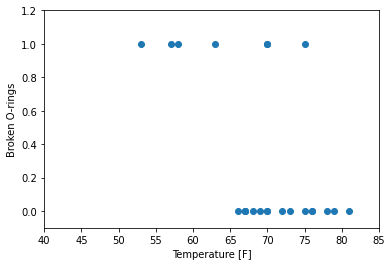

In [13]:
%matplotlib inline
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.image as imgplot
import numpy as np
import pandas as pd
import tempfile
data = np.asarray(pd.read_csv('./challenger.txt', sep=','), dtype='float32')
plt.plot(data[:,0], data[:,1], 'o')
plt.axis([40, 85, -0.1, 1.2])
plt.xlabel('Temperature [F]')
plt.ylabel('Broken O-rings')

In [14]:
y_values = data[:,1]

## Mathematical Notes

We are considering the likelihood $P(y_i=1|x_i)$ for the class $y_i=1$ given the $i-$th data point $x_i$ ($x_i$ could be a vector). This is given by:

$
P(y_i=1 | x_i) = \frac{e^{(b +  x_i w)}}{1 + e^{(b + x_i w)}} = [1 + e^{-(b + x_i w)}]^{-1}
$

If we have more than one data point, which we usually do, we have to apply the equation above to each of the N data points. In this case we can use a vectorized version with $x=(x_1,x_2,\ldots,x_N)$ and $y=(y_1,y_2,\ldots,y_N$)

### Numpy code
This numpy code, shows the calculation for one value using `NumPy` (like a single forward pass)

In [15]:
# Data
N = len(data)
x = data[:,0]
y = data[:,1]
# Initial Value for the weights
w = -0.20
b = 20.0
# Log-Likelihood 
p_1 = 1 / (1 + np.exp(-x*w - b))
like = y * np.log(p_1) + (1-y) * np.log(1-p_1)
print(-np.mean(like))
print(np.round(p_1,3))

3.882916
[0.999 0.998 0.998 0.998 0.999 0.996 0.996 0.998 1.    0.999 0.998 0.988
 0.999 1.    0.999 0.993 0.998 0.978 0.992 0.985 0.993 0.992 1.   ]


## Better values from intuition

Now lets try to find better values for $W$ and $b$. Lets assume $W$ is given with $-1$. We want the probability
for a dammage $P(y_i=1 | x_i)$ to be $0.5$.
Determine an appropriate value for $b$.
Hint: at which $x$ value should $P(y_i=1 | x_i)$ be $0.5$, look at the data. At this $x$ value the term $1 + e^{-(b + W’ x_i)}$ must be $2$.

**Solution**

$P(y=1 | x) = 0.5$ at $x \approx 65$ 

$-(b + (-1) x_i) = 0 \rightarrow b = 65$  

0.9094435
[0.269 0.007 0.018 0.047 0.119 0.001 0.    0.007 1.    0.881 0.007 0.
 0.119 1.    0.119 0.    0.007 0.    0.    0.    0.    0.    0.999]


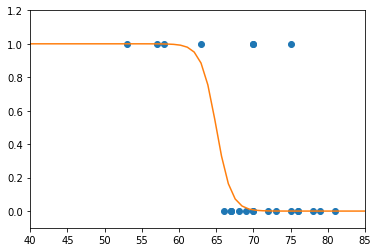

In [16]:
w_val = -1
b_val = 65
plt.plot(data[:,0], data[:,1], 'o')
plt.axis([40, 85, -0.1, 1.2])
x_pred = np.linspace(40,85)
x_pred = np.resize(x_pred,[len(x_pred),1])
y_pred = 1 / (1 + np.exp(-x_pred*w_val - b_val))
plt.plot(x_pred, y_pred)

p_1 = 1 / (1 + np.exp(-x*w_val - b_val))
like = y * np.log(p_1) + (1-y) * np.log(1-p_1)
print(-np.mean(like))
print(np.round(p_1,3))

## TODO : set up a Keras model

In [17]:
from tensorflow.keras.utils import to_categorical
y_binary = to_categorical(y)

l0 = tf.keras.layers.Dense(units=1, activation = tf.nn.sigmoid, input_shape=[1])
model = tf.keras.Sequential([l0])
model.compile(loss='binary_crossentropy', optimizer=tf.keras.optimizers.Adam(0.01))
model.fit(x, y, epochs=10000, verbose=False)

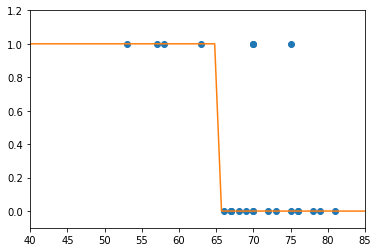

In [18]:
plt.plot(data[:,0], data[:,1], 'o')
plt.axis([40, 85, -0.1, 1.2])
x_pred = np.linspace(40,85)
x_pred = np.resize(x_pred,[len(x_pred),1])
y_pred = model.predict_classes(x_pred)
plt.plot(x_pred, y_pred)

In [19]:
print(model.get_weights())

[array([[-0.23143539]], dtype=float32), array([15.04461], dtype=float32)]


0.4418225
[[0.443 0.239 0.284 0.333 0.387 0.165 0.136 0.239 0.864 0.614 0.239 0.047
  0.387 0.942 0.387 0.09  0.239 0.024 0.073 0.038 0.09  0.073 0.835]]


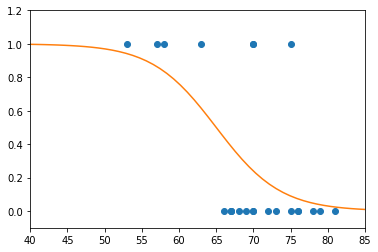

In [20]:
w_val = model.get_weights()[0]
b_val = model.get_weights()[1]
plt.plot(data[:,0], data[:,1], 'o')
plt.axis([40, 85, -0.1, 1.2])
x_pred = np.linspace(40,85)
x_pred = np.resize(x_pred,[len(x_pred),1])
y_pred = 1 / (1 + np.exp(-x_pred*w_val - b_val))
plt.plot(x_pred, y_pred)

p_1 = 1 / (1 + np.exp(-x*w_val - b_val))
like = y * np.log(p_1) + (1-y) * np.log(1-p_1)
print(-np.mean(like))
print(np.round(p_1,3))

# Exercise 3 : MNIST and Multinomial Logistic Regression

In this exercise we use multinomial logistic regression to predict the number of the handwritten digits of the MNIST dataset.

## TODO : read MNIST data and compute validation accuracy for the multinomial logistic regression model

In [21]:
from __future__ import absolute_import, division, print_function, unicode_literals
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical


# Import TensorFlow and TensorFlow Datasets
import tensorflow as tf

# Helper libraries
import math
import numpy as np
import matplotlib.pyplot as plt

# Load MNIST data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# One-hot-encoded label vector
y_train_cat = to_categorical(y_train, 10)
y_test_cat = to_categorical(y_test, 10)

model = tf.keras.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(28, 28)))
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax, batch_input_shape=(None, 784)))
model.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

history = model.fit(X_train, 
                    y_train_cat, 
                    epochs=10, 
                    validation_data=(X_test, y_test_cat))

11493376/11490434 [==============================] - 0s 0us/step
Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 5s 85us/sample - loss: 319.9237 - accuracy: 0.8414 - val_loss: 346.2594 - val_accuracy: 0.8395
Epoch 2/10
60000/60000 [==============================] - 5s 81us/sample - loss: 255.3777 - accuracy: 0.8697 - val_loss: 263.5786 - val_accuracy: 0.8611
Epoch 3/10
60000/60000 [==============================] - 5s 79us/sample - loss: 259.5848 - accuracy: 0.8706 - val_loss: 256.6105 - val_accuracy: 0.8759
Epoch 4/10
60000/60000 [==============================] - 5s 77us/sample - loss: 242.7680 - accuracy: 0.8770 - val_loss: 199.7734 - val_accuracy: 0.9007
Epoch 5/10
60000/60000 [==============================] - 5s 76us/sample - loss: 243.7667 - accuracy: 0.8778 - val_loss: 232.4277 - val_accuracy: 0.8872
Epoch 6/10
60000/60000 [==============================] - 5s 81us/sample - loss: 236.8930 - accuracy: 0.8798 - val_loss:

In [22]:
test_loss, test_accuracy = model.evaluate(X_test, y_test_cat)
print('Accuracy on test dataset:', test_accuracy)

10000/10000 [==============================] - 1s 55us/sample - loss: 290.5393 - accuracy: 0.8724
Accuracy on test dataset: 0.8724


## TODO : use different regularization terms, see [Keras Regularizer](https://keras.io/regularizers/)

In [ ]:
# Import TensorFlow and TensorFlow Datasets
import tensorflow as tf

# Helper libraries
import math
import numpy as np
import matplotlib.pyplot as plt

# Load MNIST data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# One-hot-encode label vector
y_train_cat = to_categorical(y_train, 10)
y_test_cat = to_categorical(y_test, 10)

# Define Network
model = tf.keras.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(28, 28)))
model.add(tf.keras.layers.Dense(10, 
                                activation=tf.nn.softmax, 
                                batch_input_shape=(None, 784), 
                                kernel_regularizer=tf.keras.regularizers.l2(0.01)))

# Compile Network
model.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

# Fit Network
history = model.fit(X_train, 
                    y_train_cat, 
                    epochs=10, 
                    validation_data=(X_test, y_test_cat))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 5s 83us/sample - loss: 328.2818 - accuracy: 0.8390 - val_loss: 206.0383 - val_accuracy: 0.8951
Epoch 2/10
60000/60000 [==============================] - 5s 83us/sample - loss: 285.4828 - accuracy: 0.8601 - val_loss: 236.3918 - val_accuracy: 0.8797
Epoch 3/10
60000/60000 [==============================] - 5s 81us/sample - loss: 289.9700 - accuracy: 0.8590 - val_loss: 243.5878 - val_accuracy: 0.8860
Epoch 4/10
60000/60000 [==============================] - 5s 82us/sample - loss: 281.4834 - accuracy: 0.8624 - val_loss: 255.3606 - val_accuracy: 0.8745
Epoch 5/10
60000/60000 [==============================] - 5s 78us/sample - loss: 289.1926 - accuracy: 0.8604 - val_loss: 230.2264 - val_accuracy: 0.8903
Epoch 6/10
60000/60000 [==============================] - 5s 82us/sample - loss: 288.9536 - accuracy: 0.8629 - val_loss: 237.8040 - val_accuracy: 0.8687
Epoch 7/10
60000/60000 [========

In [ ]:
# Evaluate Network
test_loss, test_accuracy = model.evaluate(X_test, y_test_cat)
print('Accuracy on test dataset:', test_accuracy)